In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
from shapely.geometry import shape, LineString

In [ ]:
# geojson built using:
# esri2geojson https://services1.arcgis.com/gGHDlz6USftL5Pau/arcgis/rest/services/ContinentalDivideNST/FeatureServer/0 data/cdt.geojson
# but gpd gives error when loading it in here
gpd.read_file("data/cdt.geojson")

DataSourceError: Failed to read GeoJSON data

In [ ]:
# instead I have to use json. luckily this works.
with open("data/cdt.geojson") as f:
    data = json.load(f)

# Build GeoDataFrame manually
geoms = []
props = []
for feature in data["features"]:
    if feature["geometry"]:  # skip nulls
        geoms.append(shape(feature["geometry"]))
        props.append(feature["properties"])

cdt = gpd.GeoDataFrame(props, geometry=geoms, crs="EPSG:4326")

In [4]:
cdt

,OBJECTID,NATIONALTRAIL,GlobalID,Shape__Length,Label,geometry
0,1491,NST-CDT,b055fb78-47dc-45ae-9b9e-d449150443e9,6.735700e+03,Rocky Mountain National Park Loop Alternate,"LINESTRING (-105.8159 40.2563, -105.81591 40.2..."
1,1492,NST-CDT,16997875-2ea9-4117-90ec-0a1e69768f06,4.377794e+04,Chief Mountain Border Crossing Alternate,"LINESTRING (-113.65698 48.80017, -113.65696 48..."
2,1493,NST-CDT,d7329404-3bf7-4665-8066-04896900eff4,4.873082e+06,CDT Primary Route,"LINESTRING (-108.20851 31.49706, -108.20852 31..."


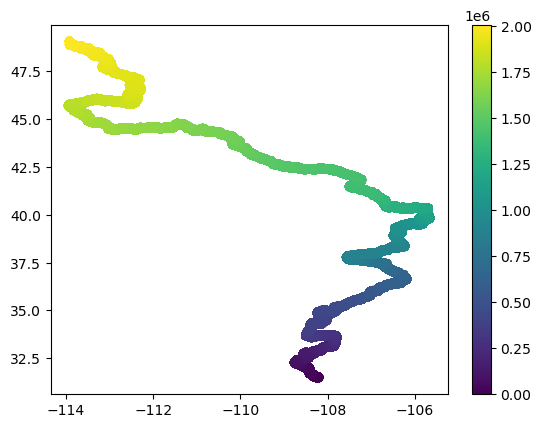

In [5]:
p = np.array(list(cdt.geometry)[2].coords)
colors = range(len(p))
plt.scatter(*p.T, c = colors)
plt.colorbar()

In [17]:
# just save primary route
cdt = gpd.GeoDataFrame(geometry=[LineString(p)], crs="epsg:4326")
cdt.to_file("data/full_CDT_NoBo.gpkg", driver='GPKG')

<Axes: >

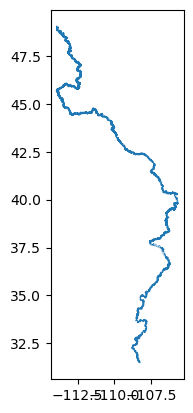

In [7]:
cdt.plot()

In [18]:
q = gpd.read_file('data/full_CDT_NoBo.gpkg')